# ASPECT EXTRACTION WITH FLAIR

In this laboratory you will learn to extract aspects from restaurant reviews using the ABSA 2016 corpus for several languages: https://alt.qcri.org/semeval2016/task5/

You can check the corpora already formatted and ready to use in the datasets folder: 

````
/content/drive/My Drive/Colab Notebooks/2022-ILTAPP/datasets/absa2016/
````

+ Sequence Labelling: You may use the files called ````$lang-(train|test -full-aspects.tsv```` files to train an aspect detector with Flair as a sequence labelling task.
+ Text Classification: Check the files called ````$lang-(train|test)-acb.tsv```` to train an aspect detection with Flair as a multilabel classification task.

## ASSIGNMENT 1

+ TODO: For the language of your choice, please inspect the relevant files to understand what the task is about and what you want to learn.

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
!pip install flair

## ASSIGNMENT 2

+ TODO Train a Aspect Category Detector system using Flair SequenceTagger
+ TODO Print learning curves to see if you need to perform more epochs
+ HINT: You can reuse the training lab for NER in order to do these tasks.

In [16]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings
from typing import List

In [17]:
# define columns
data_folder = '/content/drive/MyDrive/2022-ILTAPP/datasets/absa2016'

columns = {0: 'text', 1:'cat_detect'}

# get the corpus

corpus: Corpus = ColumnCorpus(data_folder, 
                              columns,
                              train_file='en-train-full-aspects.tsv',
                              test_file='en-test-full-aspects.tsv',
                              dev_file=None
                              )

print(corpus)

2022-03-18 14:19:47,651 Reading data from /content/drive/MyDrive/2022-ILTAPP/datasets/absa2016
2022-03-18 14:19:47,663 Train: /content/drive/MyDrive/2022-ILTAPP/datasets/absa2016/en-train-full-aspects.tsv
2022-03-18 14:19:47,666 Dev: None
2022-03-18 14:19:47,668 Test: /content/drive/MyDrive/2022-ILTAPP/datasets/absa2016/en-test-full-aspects.tsv
Corpus: 1800 train + 200 dev + 676 test sentences


In [18]:
# 2. what tag do we want to predict?

tag_type = 'cat_detect'

# 3. make the tag dictionary from the corpus
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)

print(tag_dictionary.idx2item)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated method make_tag_dictionary. (Use 'make_label_dictionary' instead.) -- Deprecated since version 0.8.
  


[b'O', b'B-RESTAURANT#GENERAL', b'B-SERVICE#GENERAL', b'B-FOOD#QUALITY', b'B-FOOD#STYLE_OPTIONS', b'B-DRINKS#PRICES', b'I-DRINKS#PRICES', b'I-SERVICE#GENERAL', b'I-FOOD#QUALITY', b'I-RESTAURANT#GENERAL', b'B-AMBIENCE#GENERAL', b'I-FOOD#STYLE_OPTIONS', b'B-DRINKS#STYLE_OPTIONS', b'I-DRINKS#STYLE_OPTIONS', b'B-FOOD#PRICES', b'I-FOOD#PRICES', b'B-RESTAURANT#MISCELLANEOUS', b'B-LOCATION#GENERAL', b'B-DRINKS#QUALITY', b'I-AMBIENCE#GENERAL', b'I-RESTAURANT#MISCELLANEOUS', b'I-LOCATION#GENERAL', b'I-DRINKS#QUALITY', b'B-RESTAURANT#PRICES', b'I-RESTAURANT#PRICES', b'<START>', b'<STOP>']


In [19]:
# initialize embeddings
embedding_types: List[TokenEmbeddings] = [
      WordEmbeddings('glove'),
      FlairEmbeddings('en-forward', chars_per_chunk=128),
      FlairEmbeddings('en-backward', chars_per_chunk=128),
      ]

embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)

2022-03-18 14:19:56,430 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmp226shzhe


100%|██████████| 160000128/160000128 [00:09<00:00, 16628623.57B/s]

2022-03-18 14:20:06,550 copying /tmp/tmp226shzhe to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2022-03-18 14:20:06,783 removing temp file /tmp/tmp226shzhe
2022-03-18 14:20:07,429 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim not found in cache, downloading to /tmp/tmpk8zaroge


100%|██████████| 21494764/21494764 [00:02<00:00, 8735401.77B/s] 

2022-03-18 14:20:10,365 copying /tmp/tmpk8zaroge to cache at /root/.flair/embeddings/glove.gensim
2022-03-18 14:20:10,389 removing temp file /tmp/tmpk8zaroge


2022-03-18 14:20:12,859 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-forward-0.4.1.pt not found in cache, downloading to /tmp/tmpf23inf1b


100%|██████████| 73034624/73034624 [00:04<00:00, 14614499.82B/s]

2022-03-18 14:20:18,334 copying /tmp/tmpf23inf1b to cache at /root/.flair/embeddings/news-forward-0.4.1.pt


2022-03-18 14:20:18,450 removing temp file /tmp/tmpf23inf1b
2022-03-18 14:20:30,649 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-backward-0.4.1.pt not found in cache, downloading to /tmp/tmpwgyq_wpp


100%|██████████| 73034575/73034575 [00:04<00:00, 14904654.58B/s]

2022-03-18 14:20:36,037 copying /tmp/tmpwgyq_wpp to cache at /root/.flair/embeddings/news-backward-0.4.1.pt


2022-03-18 14:20:36,169 removing temp file /tmp/tmpwgyq_wpp


In [20]:
# initialize sequence tagger
from flair.models import SequenceTagger

tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                        embeddings=embeddings,
                                        tag_dictionary=tag_dictionary,
                                        tag_type=tag_type
)

In [21]:
# initialize trainer
from flair.trainers import ModelTrainer
trainer: ModelTrainer = ModelTrainer(tagger, corpus)

In [25]:
trainer.train('/content/drive/MyDrive/2022-ILTAPP/glove-cat_detect-model', 
              mini_batch_size=10, 
              train_with_dev=False, 
              write_weights=True,
              max_epochs=25,
              patience=10,
              checkpoint=True)

2022-03-18 14:37:48,565 ----------------------------------------------------------------------------------------------------
2022-03-18 14:37:48,569 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      'glove'
      (embedding): Embedding(400001, 100)
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=4196, out_features=4196, b

/usr/local/lib/python3.7/dist-packages/flair/trainers/trainer.py:65: UserWarning: There should be no best model saved at epoch 1 except there is a model from previous trainings in your training folder. All previous best models will be deleted.
  "There should be no best model saved at epoch 1 except there is a model from previous trainings"


2022-03-18 14:37:49,664 epoch 1 - iter 18/180 - loss 0.04624658 - samples/sec: 182.19 - lr: 0.100000
2022-03-18 14:37:51,247 epoch 1 - iter 36/180 - loss 0.05383278 - samples/sec: 207.70 - lr: 0.100000
2022-03-18 14:37:52,756 epoch 1 - iter 54/180 - loss 0.05837162 - samples/sec: 220.17 - lr: 0.100000
2022-03-18 14:37:54,349 epoch 1 - iter 72/180 - loss 0.06025366 - samples/sec: 199.50 - lr: 0.100000
2022-03-18 14:37:55,813 epoch 1 - iter 90/180 - loss 0.06288606 - samples/sec: 219.13 - lr: 0.100000
2022-03-18 14:37:57,356 epoch 1 - iter 108/180 - loss 0.06304833 - samples/sec: 207.41 - lr: 0.100000
2022-03-18 14:37:58,940 epoch 1 - iter 126/180 - loss 0.06557695 - samples/sec: 195.87 - lr: 0.100000
2022-03-18 14:38:00,495 epoch 1 - iter 144/180 - loss 0.07108024 - samples/sec: 201.45 - lr: 0.100000
2022-03-18 14:38:02,202 epoch 1 - iter 162/180 - loss 0.06972734 - samples/sec: 172.32 - lr: 0.100000
2022-03-18 14:38:03,933 epoch 1 - iter 180/180 - loss 0.06827709 - samples/sec: 172.10 

{'dev_loss_history': [tensor(0.1655, device='cuda:0'),
  tensor(0.1756, device='cuda:0'),
  tensor(0.1726, device='cuda:0'),
  tensor(0.1726, device='cuda:0'),
  tensor(0.1912, device='cuda:0'),
  tensor(0.1794, device='cuda:0'),
  tensor(0.1886, device='cuda:0'),
  tensor(0.1795, device='cuda:0'),
  tensor(0.2099, device='cuda:0'),
  tensor(0.1891, device='cuda:0'),
  tensor(0.2029, device='cuda:0'),
  tensor(0.1903, device='cuda:0'),
  tensor(0.2022, device='cuda:0'),
  tensor(0.1990, device='cuda:0'),
  tensor(0.1944, device='cuda:0'),
  tensor(0.1808, device='cuda:0'),
  tensor(0.1943, device='cuda:0'),
  tensor(0.2023, device='cuda:0'),
  tensor(0.1890, device='cuda:0'),
  tensor(0.1933, device='cuda:0'),
  tensor(0.2113, device='cuda:0'),
  tensor(0.2127, device='cuda:0'),
  tensor(0.1854, device='cuda:0'),
  tensor(0.1882, device='cuda:0'),
  tensor(0.1882, device='cuda:0')],
 'dev_score_history': [0.5738636363636364,
  0.5963855421686747,
  0.5773809523809524,
  0.5977011494252

2022-03-18 14:47:03,696 ----------------------------------------------------------------------------------------------------
2022-03-18 14:47:03,697 WARNING: No LOSS found for test split in this data.
2022-03-18 14:47:03,700 Are you sure you want to plot LOSS and not another value?
2022-03-18 14:47:03,704 ----------------------------------------------------------------------------------------------------
2022-03-18 14:47:03,736 ----------------------------------------------------------------------------------------------------
2022-03-18 14:47:03,738 WARNING: No F1 found for test split in this data.
2022-03-18 14:47:03,742 Are you sure you want to plot F1 and not another value?
2022-03-18 14:47:03,745 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in /content/drive/MyDrive/2022-ILTAPP/glove-cat_detect-model/training.png


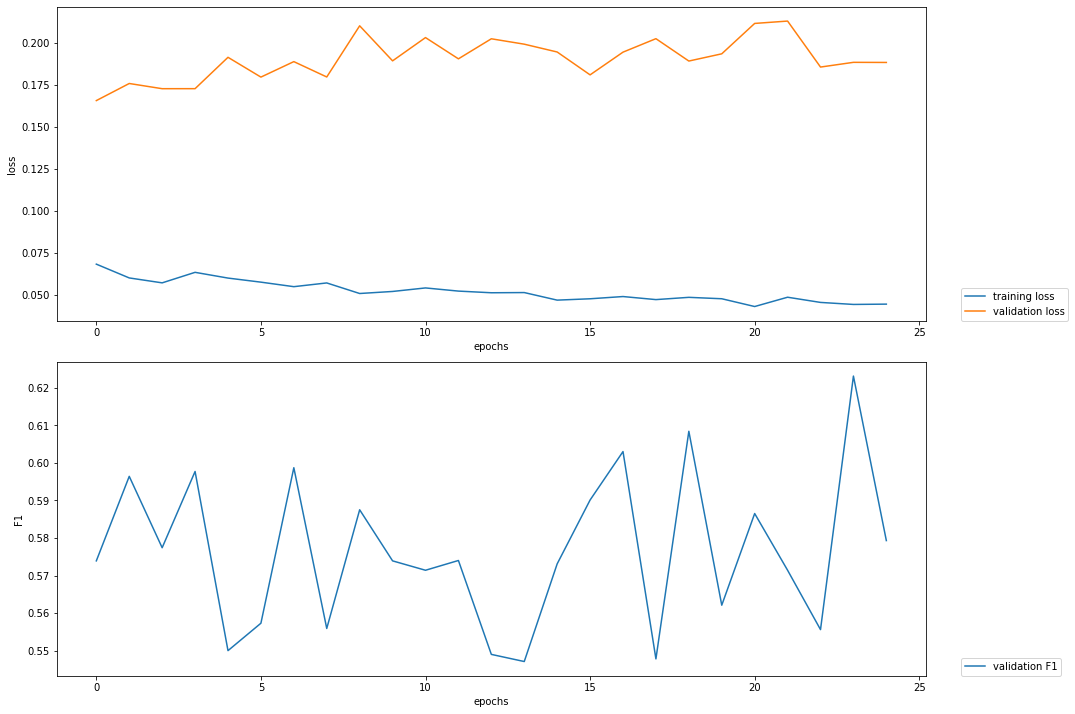

Weights plots are saved in /content/drive/MyDrive/2022-ILTAPP/glove-cat_detect-model/weights.png


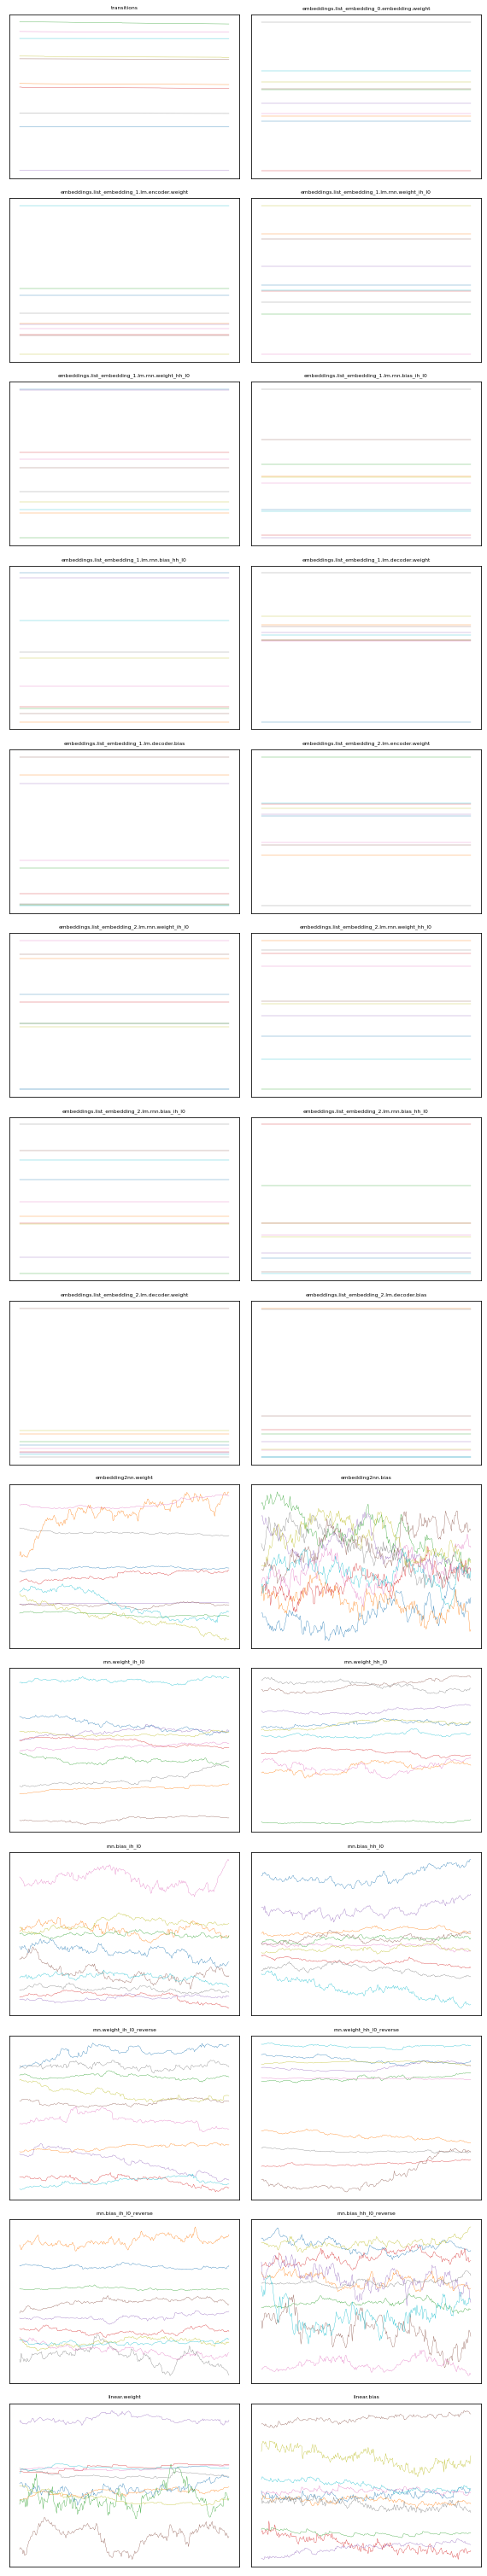

In [26]:

from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_training_curves('/content/drive/MyDrive/2022-ILTAPP/glove-cat_detect-model/loss.tsv')
plotter.plot_weights('/content/drive/MyDrive/2022-ILTAPP/glove-cat_detect-model/weights.txt')

## ASSIGNMENT 3

+ TODO Train a TextClassifier with Flair for aspect detection reusing code from previous labs
++ HINT: Install latest version of flair.
++ HINT: add a label_type='aspect' to ClassifierCorpus and Trainer.


In [ ]:
!pip install --upgrade flair

In [44]:
from flair.embeddings import WordEmbeddings, TransformerDocumentEmbeddings, DocumentRNNEmbeddings, FlairEmbeddings, DocumentLSTMEmbeddings, BertEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from flair.datasets import CSVClassificationCorpus


TDE = TransformerDocumentEmbeddings('bert-base-uncased', fine_tune=True)

label_type = 'label_aspect' 

#label_type='aspect' does not work, so I've changed to 'label_aspect'

columns = {0: 'label_aspect', 1: 'text'}

corpus: Corpus = CSVClassificationCorpus('/content/drive/MyDrive/2022-ILTAPP/datasets/absa2016',
                              columns, 
                              label_type='label_aspect', 
                              delimiter='\t',
                              train_file='en-train-acb.tsv',
                              test_file='en-test-acb.tsv')



2022-03-18 15:46:20,185 Reading data from /content/drive/MyDrive/2022-ILTAPP/datasets/absa2016
2022-03-18 15:46:20,190 Train: /content/drive/MyDrive/2022-ILTAPP/datasets/absa2016/en-train-acb.tsv
2022-03-18 15:46:20,194 Dev: None
2022-03-18 15:46:20,195 Test: /content/drive/MyDrive/2022-ILTAPP/datasets/absa2016/en-test-acb.tsv


In [50]:

# 3. make the tag dictionary from the corpus
tag_dictionary = corpus.make_label_dictionary(label_type=label_type)
print(tag_dictionary.idx2item)

#bert_embedding = BertEmbeddings()


#word_embeddings = [bert_embedding, 
 #                 WordEmbeddings('glove'),
  #                FlairEmbeddings('news-forward-fast'),
   #               FlairEmbeddings('news-backward-fast')]


#document_embeddings = DocumentRNNEmbeddings(word_embeddings,
 #                                         hidden_size= 512,
  #                                        reproject_words=True,
   #                                       reproject_words_dimension=256,
    #                                      rnn_type='LSTM',
     #                                     bidirectional= True,
      #                                    dropout = 0.2
       #                                   )

#classifier = TextClassifier(document_embeddings, label_dictionary = tag_dictionary, label_type=label_type)

#trainer = ModelTrainer(classifier, corpus)

#trainer.train('/content/drive/MyDrive/2022-ILTAPP/aspects_model',
#learning_rate = 0.05,
#mini_batch_size = 8,
#max_epochs = 16,
#anneal_factor = 0.5,
#patience = 2,
#min_learning_rate = 0.0001,
#train_with_dev = False,
#monitor_train= True,
#monitor_test = True,
#embeddings_storage_mode = 'cpu' , #'cpu'
#checkpoint = True,
#save_final_model = True,
#shuffle = True)

#Create a classifier instance with the embeddings and the label to look for
#classifier = TextClassifier(TDE, label_dictionary=tag_dictionary, label_type=label_type)

trainer = ModelTrainer(classifier, corpus)

#Train the classifier for 10 epochs
trainer.fine_tune('/content/drive/MyDrive/2022-ILTAPP/aspects_model',
              learning_rate=0.05
              mini_batch_size=10, 
              train_with_dev=False, 
              write_weights=True,
              max_epochs=5,
              patience=3,
              checkpoint=True)



2022-03-18 16:19:22,552 Computing label dictionary. Progress:


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 1800/1800 [00:01<00:00, 1100.72it/s]

2022-03-18 16:19:24,753 Corpus contains the labels: label_aspect (#1800)
2022-03-18 16:19:24,757 Created (for label 'label_aspect') Dictionary with 187 tags: <unk>, __label__RESTAURANT#GENERAL, __label__SERVICE#GENERAL, __label__FOOD#QUALITY __label__FOOD#STYLE_OPTIONS, __label__FOOD#QUALITY __label__FOOD#QUALITY, __label__DRINKS#STYLE_OPTIONS __label__DRINKS#PRICES, __label__RESTAURANT#PRICES __label__FOOD#QUALITY, __label__FOOD#QUALITY, __label__FOOD#QUALITY __label__FOOD#QUALITY __label__RESTAURANT#MISCELLANEOUS, __label__SERVICE#GENERAL __label__FOOD#QUALITY __label__RESTAURANT#PRICES, __label__FOOD#QUALITY __label__SERVICE#GENERAL __label__AMBIENCE#GENERAL, -, __label__AMBIENCE#GENERAL __label__AMBIENCE#GENERAL __label__AMBIENCE#GENERAL, __label__DRINKS#STYLE_OPTIONS __label__SERVICE#GENERAL, __label__AMBIENCE#GENERAL, __label__RESTAURANT#MISCELLANEOUS, __label__FOOD#STYLE_OPTIONS, __label__FOOD#QUALITY __label__FOOD#PRICES, __label__FOOD#QUALITY __label__SERVICE#GENERAL, __label_


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated method __init__. (Use 'TransformerWordEmbeddings' for all transformer-based word embeddings) -- Deprecated since version 0.4.5.
  


[b'<unk>', b'__label__RESTAURANT#GENERAL', b'__label__SERVICE#GENERAL', b'__label__FOOD#QUALITY __label__FOOD#STYLE_OPTIONS', b'__label__FOOD#QUALITY __label__FOOD#QUALITY', b'__label__DRINKS#STYLE_OPTIONS __label__DRINKS#PRICES', b'__label__RESTAURANT#PRICES __label__FOOD#QUALITY', b'__label__FOOD#QUALITY', b'__label__FOOD#QUALITY __label__FOOD#QUALITY __label__RESTAURANT#MISCELLANEOUS', b'__label__SERVICE#GENERAL __label__FOOD#QUALITY __label__RESTAURANT#PRICES', b'__label__FOOD#QUALITY __label__SERVICE#GENERAL __label__AMBIENCE#GENERAL', b'-', b'__label__AMBIENCE#GENERAL __label__AMBIENCE#GENERAL __label__AMBIENCE#GENERAL', b'__label__DRINKS#STYLE_OPTIONS __label__SERVICE#GENERAL', b'__label__AMBIENCE#GENERAL', b'__label__RESTAURANT#MISCELLANEOUS', b'__label__FOOD#STYLE_OPTIONS', b'__label__FOOD#QUALITY __label__FOOD#PRICES', b'__label__FOOD#QUALITY __label__SERVICE#GENERAL', b'__label__FOOD#QUALITY __label__FOOD#STYLE_OPTIONS __label__FOOD#PRICES', b'__label__FOOD#STYLE_OPTIONS __l

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


2022-03-18 16:19:30,591 ----------------------------------------------------------------------------------------------------
2022-03-18 16:19:30,600 Model: "TextClassifier(
  (loss_function): CrossEntropyLoss()
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): BertEmbeddings(
        (model): BertModel(
          (embeddings): BertEmbeddings(
            (word_embeddings): Embedding(30522, 768, padding_idx=0)
            (position_embeddings): Embedding(512, 768)
            (token_type_embeddings): Embedding(2, 768)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (encoder): BertEncoder(
            (layer): ModuleList(
              (0): BertLayer(
                (attention): BertAttention(
                  (self): BertSelfAttention(
                    (query): Linear(in_features=768, out_features=768, bias=True)
    

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:19:33,113 epoch 1 - iter 22/225 - loss 0.49243362 - samples/sec: 89.76 - lr: 0.050000
2022-03-18 16:19:34,946 epoch 1 - iter 44/225 - loss 0.45317594 - samples/sec: 98.65 - lr: 0.050000
2022-03-18 16:19:36,640 epoch 1 - iter 66/225 - loss 0.43765468 - samples/sec: 105.71 - lr: 0.050000
2022-03-18 16:19:38,379 epoch 1 - iter 88/225 - loss 0.42102728 - samples/sec: 104.18 - lr: 0.050000
2022-03-18 16:19:40,115 epoch 1 - iter 110/225 - loss 0.41302118 - samples/sec: 104.22 - lr: 0.050000
2022-03-18 16:19:41,781 epoch 1 - iter 132/225 - loss 0.40821919 - samples/sec: 107.93 - lr: 0.050000
2022-03-18 16:19:43,595 epoch 1 - iter 154/225 - loss 0.40201860 - samples/sec: 98.86 - lr: 0.050000
2022-03-18 16:19:45,383 epoch 1 - iter 176/225 - loss 0.39530407 - samples/sec: 100.43 - lr: 0.050000
2022-03-18 16:19:47,429 epoch 1 - iter 198/225 - loss 0.39251508 - samples/sec: 87.70 - lr: 0.050000
2022-03-18 16:19:50,640 epoch 1 - iter 220/225 - loss 0.38783689 - samples/sec: 56.71 - lr

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:20:13,177 DEV : loss 0.3878703713417053 - f1-score (micro avg)  0.225


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:20:20,573 TEST : loss 0.3883345127105713 - f1-score (micro avg)  0.25
2022-03-18 16:20:20,881 BAD EPOCHS (no improvement): 0
2022-03-18 16:20:23,816 saving best model
2022-03-18 16:20:27,234 ----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:20:29,564 epoch 2 - iter 22/225 - loss 0.33191236 - samples/sec: 95.38 - lr: 0.050000
2022-03-18 16:20:32,201 epoch 2 - iter 44/225 - loss 0.30954974 - samples/sec: 92.81 - lr: 0.050000
2022-03-18 16:20:34,822 epoch 2 - iter 66/225 - loss 0.30243093 - samples/sec: 69.59 - lr: 0.050000
2022-03-18 16:20:37,947 epoch 2 - iter 88/225 - loss 0.30293130 - samples/sec: 57.56 - lr: 0.050000
2022-03-18 16:20:40,951 epoch 2 - iter 110/225 - loss 0.29763951 - samples/sec: 60.29 - lr: 0.050000
2022-03-18 16:20:43,294 epoch 2 - iter 132/225 - loss 0.29805674 - samples/sec: 76.76 - lr: 0.050000
2022-03-18 16:20:45,332 epoch 2 - iter 154/225 - loss 0.29721516 - samples/sec: 88.49 - lr: 0.050000
2022-03-18 16:20:47,210 epoch 2 - iter 176/225 - loss 0.29762765 - samples/sec: 95.91 - lr: 0.050000
2022-03-18 16:20:49,071 epoch 2 - iter 198/225 - loss 0.29596348 - samples/sec: 96.05 - lr: 0.050000
2022-03-18 16:20:50,998 epoch 2 - iter 220/225 - loss 0.29792625 - samples/sec: 92.72 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:21:13,557 DEV : loss 0.3244175612926483 - f1-score (micro avg)  0.43


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:21:21,393 TEST : loss 0.3153497278690338 - f1-score (micro avg)  0.4467
2022-03-18 16:21:21,682 BAD EPOCHS (no improvement): 0
2022-03-18 16:21:25,093 saving best model
2022-03-18 16:21:28,143 ----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:21:30,671 epoch 3 - iter 22/225 - loss 0.22849055 - samples/sec: 91.10 - lr: 0.050000
2022-03-18 16:21:33,067 epoch 3 - iter 44/225 - loss 0.22912526 - samples/sec: 74.63 - lr: 0.050000
2022-03-18 16:21:35,521 epoch 3 - iter 66/225 - loss 0.23616352 - samples/sec: 73.44 - lr: 0.050000
2022-03-18 16:21:37,825 epoch 3 - iter 88/225 - loss 0.24635298 - samples/sec: 78.22 - lr: 0.050000
2022-03-18 16:21:40,154 epoch 3 - iter 110/225 - loss 0.24820930 - samples/sec: 76.97 - lr: 0.050000
2022-03-18 16:21:42,213 epoch 3 - iter 132/225 - loss 0.25036009 - samples/sec: 87.45 - lr: 0.050000
2022-03-18 16:21:44,478 epoch 3 - iter 154/225 - loss 0.24952682 - samples/sec: 79.33 - lr: 0.050000
2022-03-18 16:21:46,895 epoch 3 - iter 176/225 - loss 0.25059193 - samples/sec: 73.69 - lr: 0.050000
2022-03-18 16:21:49,503 epoch 3 - iter 198/225 - loss 0.25506596 - samples/sec: 69.92 - lr: 0.050000
2022-03-18 16:21:51,364 epoch 3 - iter 220/225 - loss 0.25602130 - samples/sec: 96.38 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:22:13,530 DEV : loss 0.29502245783805847 - f1-score (micro avg)  0.485


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:22:21,306 TEST : loss 0.2965546250343323 - f1-score (micro avg)  0.4749
2022-03-18 16:22:21,609 BAD EPOCHS (no improvement): 0
2022-03-18 16:22:24,863 saving best model
2022-03-18 16:22:27,897 ----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:22:30,385 epoch 4 - iter 22/225 - loss 0.18923283 - samples/sec: 88.59 - lr: 0.050000
2022-03-18 16:22:32,867 epoch 4 - iter 44/225 - loss 0.20311685 - samples/sec: 72.20 - lr: 0.050000
2022-03-18 16:22:35,430 epoch 4 - iter 66/225 - loss 0.20245149 - samples/sec: 70.36 - lr: 0.050000
2022-03-18 16:22:37,810 epoch 4 - iter 88/225 - loss 0.20477161 - samples/sec: 74.91 - lr: 0.050000
2022-03-18 16:22:39,906 epoch 4 - iter 110/225 - loss 0.21109467 - samples/sec: 85.02 - lr: 0.050000
2022-03-18 16:22:42,169 epoch 4 - iter 132/225 - loss 0.20684160 - samples/sec: 79.13 - lr: 0.050000
2022-03-18 16:22:44,502 epoch 4 - iter 154/225 - loss 0.21203042 - samples/sec: 77.67 - lr: 0.050000
2022-03-18 16:22:46,703 epoch 4 - iter 176/225 - loss 0.21252412 - samples/sec: 81.66 - lr: 0.050000
2022-03-18 16:22:48,949 epoch 4 - iter 198/225 - loss 0.21531414 - samples/sec: 80.38 - lr: 0.050000
2022-03-18 16:22:50,792 epoch 4 - iter 220/225 - loss 0.21762744 - samples/sec: 97.00 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:23:12,937 DEV : loss 0.3067399561405182 - f1-score (micro avg)  0.46


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:23:20,762 TEST : loss 0.3119797110557556 - f1-score (micro avg)  0.4541
2022-03-18 16:23:21,078 BAD EPOCHS (no improvement): 1
2022-03-18 16:23:24,470 ----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:23:26,926 epoch 5 - iter 22/225 - loss 0.18191686 - samples/sec: 92.67 - lr: 0.050000
2022-03-18 16:23:28,790 epoch 5 - iter 44/225 - loss 0.18661010 - samples/sec: 96.87 - lr: 0.050000
2022-03-18 16:23:30,717 epoch 5 - iter 66/225 - loss 0.17686228 - samples/sec: 92.97 - lr: 0.050000
2022-03-18 16:23:32,957 epoch 5 - iter 88/225 - loss 0.17629075 - samples/sec: 80.24 - lr: 0.050000
2022-03-18 16:23:35,434 epoch 5 - iter 110/225 - loss 0.17897504 - samples/sec: 72.72 - lr: 0.050000
2022-03-18 16:23:37,905 epoch 5 - iter 132/225 - loss 0.18310895 - samples/sec: 72.43 - lr: 0.050000
2022-03-18 16:23:39,901 epoch 5 - iter 154/225 - loss 0.18233029 - samples/sec: 90.78 - lr: 0.050000
2022-03-18 16:23:41,916 epoch 5 - iter 176/225 - loss 0.18348969 - samples/sec: 89.04 - lr: 0.050000
2022-03-18 16:23:43,640 epoch 5 - iter 198/225 - loss 0.18143564 - samples/sec: 103.72 - lr: 0.050000
2022-03-18 16:23:45,345 epoch 5 - iter 220/225 - loss 0.18083696 - samples/sec: 105.88 - lr: 0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:24:07,589 DEV : loss 0.3166809678077698 - f1-score (micro avg)  0.455


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:24:15,505 TEST : loss 0.30012333393096924 - f1-score (micro avg)  0.466
2022-03-18 16:24:15,798 BAD EPOCHS (no improvement): 2
2022-03-18 16:24:18,821 ----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:24:21,362 epoch 6 - iter 22/225 - loss 0.14862095 - samples/sec: 89.78 - lr: 0.050000
2022-03-18 16:24:23,332 epoch 6 - iter 44/225 - loss 0.14719164 - samples/sec: 91.13 - lr: 0.050000
2022-03-18 16:24:25,529 epoch 6 - iter 66/225 - loss 0.15025554 - samples/sec: 81.93 - lr: 0.050000
2022-03-18 16:24:27,980 epoch 6 - iter 88/225 - loss 0.14170649 - samples/sec: 73.75 - lr: 0.050000
2022-03-18 16:24:30,306 epoch 6 - iter 110/225 - loss 0.14019817 - samples/sec: 77.73 - lr: 0.050000
2022-03-18 16:24:32,466 epoch 6 - iter 132/225 - loss 0.14070806 - samples/sec: 82.80 - lr: 0.050000
2022-03-18 16:24:34,322 epoch 6 - iter 154/225 - loss 0.14389841 - samples/sec: 98.03 - lr: 0.050000
2022-03-18 16:24:36,190 epoch 6 - iter 176/225 - loss 0.14784040 - samples/sec: 95.98 - lr: 0.050000
2022-03-18 16:24:37,909 epoch 6 - iter 198/225 - loss 0.14935124 - samples/sec: 103.67 - lr: 0.050000
2022-03-18 16:24:39,754 epoch 6 - iter 220/225 - loss 0.15009412 - samples/sec: 98.08 - lr: 0.

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:25:01,888 DEV : loss 0.3155713975429535 - f1-score (micro avg)  0.48


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:25:09,694 TEST : loss 0.29598549008369446 - f1-score (micro avg)  0.497
Epoch     6: reducing learning rate of group 0 to 2.5000e-02.
2022-03-18 16:25:09,977 BAD EPOCHS (no improvement): 3
2022-03-18 16:25:12,946 ----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:25:15,375 epoch 7 - iter 22/225 - loss 0.09660649 - samples/sec: 91.70 - lr: 0.025000
2022-03-18 16:25:17,324 epoch 7 - iter 44/225 - loss 0.10614618 - samples/sec: 92.04 - lr: 0.025000
2022-03-18 16:25:19,183 epoch 7 - iter 66/225 - loss 0.10328025 - samples/sec: 95.85 - lr: 0.025000
2022-03-18 16:25:21,645 epoch 7 - iter 88/225 - loss 0.10334883 - samples/sec: 72.75 - lr: 0.025000
2022-03-18 16:25:24,020 epoch 7 - iter 110/225 - loss 0.10017089 - samples/sec: 75.88 - lr: 0.025000
2022-03-18 16:25:26,400 epoch 7 - iter 132/225 - loss 0.10021038 - samples/sec: 76.25 - lr: 0.025000
2022-03-18 16:25:28,429 epoch 7 - iter 154/225 - loss 0.09864297 - samples/sec: 89.08 - lr: 0.025000
2022-03-18 16:25:30,140 epoch 7 - iter 176/225 - loss 0.09841871 - samples/sec: 105.31 - lr: 0.025000
2022-03-18 16:25:32,079 epoch 7 - iter 198/225 - loss 0.09818740 - samples/sec: 93.28 - lr: 0.025000
2022-03-18 16:25:33,904 epoch 7 - iter 220/225 - loss 0.09776818 - samples/sec: 99.11 - lr: 0.

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:25:56,066 DEV : loss 0.3015877604484558 - f1-score (micro avg)  0.505


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:26:03,936 TEST : loss 0.30598199367523193 - f1-score (micro avg)  0.4734
2022-03-18 16:26:04,227 BAD EPOCHS (no improvement): 0
2022-03-18 16:26:07,160 saving best model
2022-03-18 16:26:10,500 ----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:26:12,994 epoch 8 - iter 22/225 - loss 0.07455725 - samples/sec: 90.39 - lr: 0.025000
2022-03-18 16:26:15,165 epoch 8 - iter 44/225 - loss 0.07002758 - samples/sec: 82.70 - lr: 0.025000
2022-03-18 16:26:17,501 epoch 8 - iter 66/225 - loss 0.06494683 - samples/sec: 77.89 - lr: 0.025000
2022-03-18 16:26:19,935 epoch 8 - iter 88/225 - loss 0.06670947 - samples/sec: 73.76 - lr: 0.025000
2022-03-18 16:26:22,585 epoch 8 - iter 110/225 - loss 0.07175218 - samples/sec: 67.58 - lr: 0.025000
2022-03-18 16:26:24,777 epoch 8 - iter 132/225 - loss 0.07233766 - samples/sec: 82.06 - lr: 0.025000
2022-03-18 16:26:27,085 epoch 8 - iter 154/225 - loss 0.07185907 - samples/sec: 78.58 - lr: 0.025000
2022-03-18 16:26:29,280 epoch 8 - iter 176/225 - loss 0.07187955 - samples/sec: 81.22 - lr: 0.025000
2022-03-18 16:26:31,447 epoch 8 - iter 198/225 - loss 0.07368873 - samples/sec: 82.16 - lr: 0.025000
2022-03-18 16:26:33,517 epoch 8 - iter 220/225 - loss 0.07441840 - samples/sec: 87.09 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:26:55,777 DEV : loss 0.3088472783565521 - f1-score (micro avg)  0.49


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:27:03,721 TEST : loss 0.31123360991477966 - f1-score (micro avg)  0.4911
2022-03-18 16:27:04,004 BAD EPOCHS (no improvement): 1
2022-03-18 16:27:06,947 ----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:27:09,465 epoch 9 - iter 22/225 - loss 0.05570892 - samples/sec: 90.86 - lr: 0.025000
2022-03-18 16:27:11,365 epoch 9 - iter 44/225 - loss 0.05470638 - samples/sec: 93.95 - lr: 0.025000
2022-03-18 16:27:13,238 epoch 9 - iter 66/225 - loss 0.05651608 - samples/sec: 95.70 - lr: 0.025000
2022-03-18 16:27:15,324 epoch 9 - iter 88/225 - loss 0.05834009 - samples/sec: 85.91 - lr: 0.025000
2022-03-18 16:27:17,441 epoch 9 - iter 110/225 - loss 0.05332942 - samples/sec: 84.32 - lr: 0.025000
2022-03-18 16:27:19,605 epoch 9 - iter 132/225 - loss 0.05529855 - samples/sec: 84.05 - lr: 0.025000
2022-03-18 16:27:21,949 epoch 9 - iter 154/225 - loss 0.05544490 - samples/sec: 75.78 - lr: 0.025000
2022-03-18 16:27:24,218 epoch 9 - iter 176/225 - loss 0.05622663 - samples/sec: 80.48 - lr: 0.025000
2022-03-18 16:27:26,647 epoch 9 - iter 198/225 - loss 0.05469948 - samples/sec: 73.32 - lr: 0.025000
2022-03-18 16:27:28,573 epoch 9 - iter 220/225 - loss 0.05627598 - samples/sec: 92.22 - lr: 0.0

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:27:50,720 DEV : loss 0.33107051253318787 - f1-score (micro avg)  0.5


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:27:58,058 TEST : loss 0.32927805185317993 - f1-score (micro avg)  0.4867
2022-03-18 16:27:58,343 BAD EPOCHS (no improvement): 2
2022-03-18 16:28:01,397 ----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:28:03,805 epoch 10 - iter 22/225 - loss 0.03888740 - samples/sec: 93.20 - lr: 0.025000
2022-03-18 16:28:05,584 epoch 10 - iter 44/225 - loss 0.03563391 - samples/sec: 100.74 - lr: 0.025000
2022-03-18 16:28:07,674 epoch 10 - iter 66/225 - loss 0.03703562 - samples/sec: 85.63 - lr: 0.025000
2022-03-18 16:28:09,868 epoch 10 - iter 88/225 - loss 0.03994107 - samples/sec: 81.64 - lr: 0.025000
2022-03-18 16:28:11,772 epoch 10 - iter 110/225 - loss 0.03991185 - samples/sec: 94.68 - lr: 0.025000
2022-03-18 16:28:13,804 epoch 10 - iter 132/225 - loss 0.04147148 - samples/sec: 88.49 - lr: 0.025000
2022-03-18 16:28:15,939 epoch 10 - iter 154/225 - loss 0.04323695 - samples/sec: 83.69 - lr: 0.025000
2022-03-18 16:28:18,883 epoch 10 - iter 176/225 - loss 0.04380286 - samples/sec: 60.75 - lr: 0.025000
2022-03-18 16:28:20,801 epoch 10 - iter 198/225 - loss 0.04271897 - samples/sec: 93.98 - lr: 0.025000
2022-03-18 16:28:22,707 epoch 10 - iter 220/225 - loss 0.04288825 - samples/sec: 94.5

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:28:44,814 DEV : loss 0.35025086998939514 - f1-score (micro avg)  0.485


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:28:52,049 TEST : loss 0.3386595845222473 - f1-score (micro avg)  0.4852
Epoch    10: reducing learning rate of group 0 to 1.2500e-02.
2022-03-18 16:28:52,341 BAD EPOCHS (no improvement): 3
2022-03-18 16:28:55,337 ----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:28:57,880 epoch 11 - iter 22/225 - loss 0.03578211 - samples/sec: 88.78 - lr: 0.012500
2022-03-18 16:28:59,833 epoch 11 - iter 44/225 - loss 0.03149945 - samples/sec: 91.81 - lr: 0.012500
2022-03-18 16:29:01,764 epoch 11 - iter 66/225 - loss 0.02761292 - samples/sec: 93.08 - lr: 0.012500
2022-03-18 16:29:04,089 epoch 11 - iter 88/225 - loss 0.02677830 - samples/sec: 77.15 - lr: 0.012500
2022-03-18 16:29:06,376 epoch 11 - iter 110/225 - loss 0.02670720 - samples/sec: 78.38 - lr: 0.012500
2022-03-18 16:29:08,652 epoch 11 - iter 132/225 - loss 0.02692722 - samples/sec: 78.55 - lr: 0.012500
2022-03-18 16:29:10,856 epoch 11 - iter 154/225 - loss 0.02614392 - samples/sec: 81.42 - lr: 0.012500
2022-03-18 16:29:12,790 epoch 11 - iter 176/225 - loss 0.02583840 - samples/sec: 92.23 - lr: 0.012500
2022-03-18 16:29:14,504 epoch 11 - iter 198/225 - loss 0.02551833 - samples/sec: 104.77 - lr: 0.012500
2022-03-18 16:29:16,764 epoch 11 - iter 220/225 - loss 0.02550141 - samples/sec: 104.

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:29:38,395 DEV : loss 0.3482670187950134 - f1-score (micro avg)  0.515


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:29:46,202 TEST : loss 0.33978766202926636 - f1-score (micro avg)  0.4956
2022-03-18 16:29:46,499 BAD EPOCHS (no improvement): 0
2022-03-18 16:29:50,009 saving best model
2022-03-18 16:29:53,134 ----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:29:55,652 epoch 12 - iter 22/225 - loss 0.01850267 - samples/sec: 87.35 - lr: 0.012500
2022-03-18 16:29:58,049 epoch 12 - iter 44/225 - loss 0.01744812 - samples/sec: 74.70 - lr: 0.012500
2022-03-18 16:30:00,586 epoch 12 - iter 66/225 - loss 0.01732144 - samples/sec: 71.39 - lr: 0.012500
2022-03-18 16:30:02,913 epoch 12 - iter 88/225 - loss 0.01681879 - samples/sec: 77.77 - lr: 0.012500
2022-03-18 16:30:05,051 epoch 12 - iter 110/225 - loss 0.01687396 - samples/sec: 85.18 - lr: 0.012500
2022-03-18 16:30:07,268 epoch 12 - iter 132/225 - loss 0.01816050 - samples/sec: 80.58 - lr: 0.012500
2022-03-18 16:30:09,493 epoch 12 - iter 154/225 - loss 0.01836310 - samples/sec: 81.48 - lr: 0.012500
2022-03-18 16:30:11,678 epoch 12 - iter 176/225 - loss 0.01972203 - samples/sec: 82.18 - lr: 0.012500
2022-03-18 16:30:13,929 epoch 12 - iter 198/225 - loss 0.01936009 - samples/sec: 79.56 - lr: 0.012500
2022-03-18 16:30:16,560 epoch 12 - iter 220/225 - loss 0.01903780 - samples/sec: 68.15

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:30:38,745 DEV : loss 0.35134342312812805 - f1-score (micro avg)  0.5


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:30:46,053 TEST : loss 0.35141319036483765 - f1-score (micro avg)  0.5118
2022-03-18 16:30:46,350 BAD EPOCHS (no improvement): 1
2022-03-18 16:30:49,325 ----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:30:51,940 epoch 13 - iter 22/225 - loss 0.01376309 - samples/sec: 90.57 - lr: 0.012500
2022-03-18 16:30:53,764 epoch 13 - iter 44/225 - loss 0.01755422 - samples/sec: 98.50 - lr: 0.012500
2022-03-18 16:30:55,773 epoch 13 - iter 66/225 - loss 0.01608333 - samples/sec: 89.01 - lr: 0.012500
2022-03-18 16:30:57,941 epoch 13 - iter 88/225 - loss 0.01655604 - samples/sec: 83.68 - lr: 0.012500
2022-03-18 16:31:00,144 epoch 13 - iter 110/225 - loss 0.01657252 - samples/sec: 81.28 - lr: 0.012500
2022-03-18 16:31:02,249 epoch 13 - iter 132/225 - loss 0.01685662 - samples/sec: 85.44 - lr: 0.012500
2022-03-18 16:31:04,528 epoch 13 - iter 154/225 - loss 0.01674749 - samples/sec: 79.10 - lr: 0.012500
2022-03-18 16:31:06,689 epoch 13 - iter 176/225 - loss 0.01619906 - samples/sec: 83.45 - lr: 0.012500
2022-03-18 16:31:08,978 epoch 13 - iter 198/225 - loss 0.01628442 - samples/sec: 77.64 - lr: 0.012500
2022-03-18 16:31:10,803 epoch 13 - iter 220/225 - loss 0.01633360 - samples/sec: 98.42

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:31:32,855 DEV : loss 0.35255470871925354 - f1-score (micro avg)  0.52


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:31:40,098 TEST : loss 0.35474830865859985 - f1-score (micro avg)  0.5133
2022-03-18 16:31:40,385 BAD EPOCHS (no improvement): 0
2022-03-18 16:31:43,368 saving best model
2022-03-18 16:31:46,885 ----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:31:49,421 epoch 14 - iter 22/225 - loss 0.01135400 - samples/sec: 87.06 - lr: 0.012500
2022-03-18 16:31:51,644 epoch 14 - iter 44/225 - loss 0.01245624 - samples/sec: 80.85 - lr: 0.012500
2022-03-18 16:31:53,775 epoch 14 - iter 66/225 - loss 0.01169911 - samples/sec: 83.92 - lr: 0.012500
2022-03-18 16:31:56,063 epoch 14 - iter 88/225 - loss 0.01166231 - samples/sec: 79.59 - lr: 0.012500
2022-03-18 16:31:58,310 epoch 14 - iter 110/225 - loss 0.01178981 - samples/sec: 80.51 - lr: 0.012500
2022-03-18 16:32:00,469 epoch 14 - iter 132/225 - loss 0.01207549 - samples/sec: 83.30 - lr: 0.012500
2022-03-18 16:32:03,238 epoch 14 - iter 154/225 - loss 0.01222664 - samples/sec: 83.46 - lr: 0.012500
2022-03-18 16:32:05,390 epoch 14 - iter 176/225 - loss 0.01240616 - samples/sec: 84.02 - lr: 0.012500
2022-03-18 16:32:07,374 epoch 14 - iter 198/225 - loss 0.01274497 - samples/sec: 90.90 - lr: 0.012500
2022-03-18 16:32:09,611 epoch 14 - iter 220/225 - loss 0.01261920 - samples/sec: 79.82

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:32:32,221 DEV : loss 0.3543095588684082 - f1-score (micro avg)  0.495


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:32:39,482 TEST : loss 0.35855531692504883 - f1-score (micro avg)  0.5015
2022-03-18 16:32:39,771 BAD EPOCHS (no improvement): 1
2022-03-18 16:32:42,745 ----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:32:45,219 epoch 15 - iter 22/225 - loss 0.00816966 - samples/sec: 92.70 - lr: 0.012500
2022-03-18 16:32:47,056 epoch 15 - iter 44/225 - loss 0.00809118 - samples/sec: 97.77 - lr: 0.012500
2022-03-18 16:32:49,001 epoch 15 - iter 66/225 - loss 0.00865340 - samples/sec: 92.55 - lr: 0.012500
2022-03-18 16:32:51,183 epoch 15 - iter 88/225 - loss 0.00852242 - samples/sec: 82.51 - lr: 0.012500
2022-03-18 16:32:54,092 epoch 15 - iter 110/225 - loss 0.00912981 - samples/sec: 79.84 - lr: 0.012500
2022-03-18 16:32:56,359 epoch 15 - iter 132/225 - loss 0.00927813 - samples/sec: 79.39 - lr: 0.012500
2022-03-18 16:32:58,585 epoch 15 - iter 154/225 - loss 0.00940855 - samples/sec: 80.66 - lr: 0.012500
2022-03-18 16:33:00,528 epoch 15 - iter 176/225 - loss 0.00949556 - samples/sec: 92.22 - lr: 0.012500
2022-03-18 16:33:02,196 epoch 15 - iter 198/225 - loss 0.00946126 - samples/sec: 107.57 - lr: 0.012500
2022-03-18 16:33:04,112 epoch 15 - iter 220/225 - loss 0.00980217 - samples/sec: 93.2

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:33:26,011 DEV : loss 0.3649003207683563 - f1-score (micro avg)  0.505


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:33:33,227 TEST : loss 0.3796529471874237 - f1-score (micro avg)  0.5
2022-03-18 16:33:33,529 BAD EPOCHS (no improvement): 2
2022-03-18 16:33:36,540 ----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:33:38,884 epoch 16 - iter 22/225 - loss 0.00759205 - samples/sec: 95.08 - lr: 0.012500
2022-03-18 16:33:40,848 epoch 16 - iter 44/225 - loss 0.00843007 - samples/sec: 91.77 - lr: 0.012500
2022-03-18 16:33:43,046 epoch 16 - iter 66/225 - loss 0.00797900 - samples/sec: 81.63 - lr: 0.012500
2022-03-18 16:33:45,269 epoch 16 - iter 88/225 - loss 0.00908917 - samples/sec: 80.06 - lr: 0.012500
2022-03-18 16:33:47,408 epoch 16 - iter 110/225 - loss 0.00875063 - samples/sec: 84.69 - lr: 0.012500
2022-03-18 16:33:50,482 epoch 16 - iter 132/225 - loss 0.00856702 - samples/sec: 74.38 - lr: 0.012500
2022-03-18 16:33:52,464 epoch 16 - iter 154/225 - loss 0.00848229 - samples/sec: 90.94 - lr: 0.012500
2022-03-18 16:33:54,231 epoch 16 - iter 176/225 - loss 0.00837610 - samples/sec: 101.60 - lr: 0.012500
2022-03-18 16:33:56,016 epoch 16 - iter 198/225 - loss 0.00827655 - samples/sec: 100.21 - lr: 0.012500
2022-03-18 16:33:57,806 epoch 16 - iter 220/225 - loss 0.00821342 - samples/sec: 100

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:34:19,934 DEV : loss 0.39884743094444275 - f1-score (micro avg)  0.485


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:34:27,116 TEST : loss 0.38956591486930847 - f1-score (micro avg)  0.5074
Epoch    16: reducing learning rate of group 0 to 6.2500e-03.
2022-03-18 16:34:27,412 BAD EPOCHS (no improvement): 3
2022-03-18 16:34:33,586 ----------------------------------------------------------------------------------------------------
2022-03-18 16:34:33,612 loading file /content/drive/MyDrive/2022-ILTAPP/aspects_model/best-model.pt


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2022-03-18 16:34:46,461 0.5133	0.5133	0.5133	0.5133
2022-03-18 16:34:46,468 
Results:
- F-score (micro) 0.5133
- F-score (macro) 0.091
- Accuracy 0.5133

By class:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               precision    recall  f1-score   support

                                                                                                                                                                                                            

Loss and F1 plots are saved in /content/drive/MyDrive/2022-ILTAPP/aspects_model/training.png


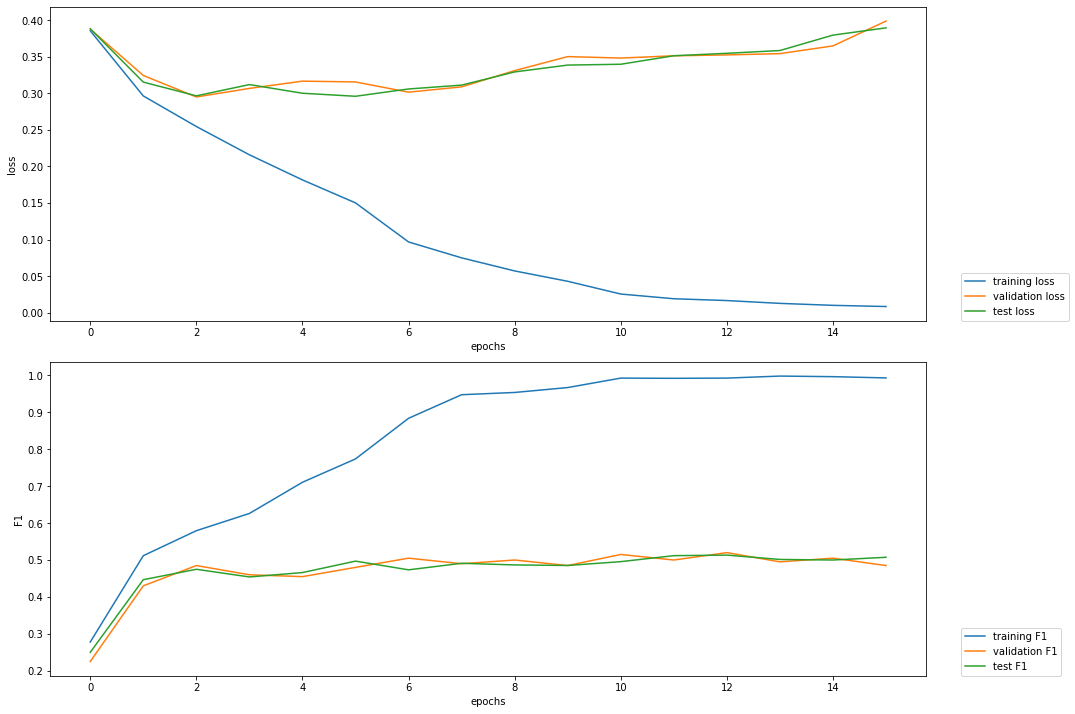

In [52]:
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_training_curves('/content/drive/MyDrive/2022-ILTAPP/aspects_model/loss.tsv')
#plotter.plot_weights('/content/drive/MyDrive/2022-ILTAPP/aspects_model/weights.txt')

In [59]:
#import flair
#from flair.models import TextClassifier
#from flair.data import Sentence

#classifier = TextClassifier.load('/content/drive/MyDrive/2022-ILTAPP/aspects_model/best-model.pt')

#def document_classification(new_sentences, model):

  #new_sentences is the list of texts to be classified
#  sentences = [Sentence(txt) for txt in (new_sentences)]

#  model.eval()
 # model.predict(sentences)
 # output_sentence = []
 # count = 0

  #for sentence in sentences: 
   #   if str(sentence.labels[0]).split()[0] == "label_aspect" :
    #      output_sentence.append(new_sentences[count])     
     # count+=1

  #return(output_sentence)
#predictions = document_classification('/content/drive/MyDrive/2022-ILTAPP/datasets/absa2016/en-test-polarity.tsv', classifier)
#print(predictions)

2022-03-18 16:44:35,895 loading file /content/drive/MyDrive/2022-ILTAPP/aspects_model/best-model.pt
[]


## (BONUS) ASSIGNMENT 4

Print the 5 most common errors (False Positives and False Negatives) from the results obtained above per type of ASPECT in the Sequence Labelling approach to ACD.

+ TODO Print the 5 most common errors from FOOD#QUALITY, etc.
+ TODO Train a polarity classifier for 